<a href="https://colab.research.google.com/github/EdipoMarques/PayrollCalculator/blob/main/Copy_of_fake_and_real_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake and Real news detection**

Library Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Exploring fake news **

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

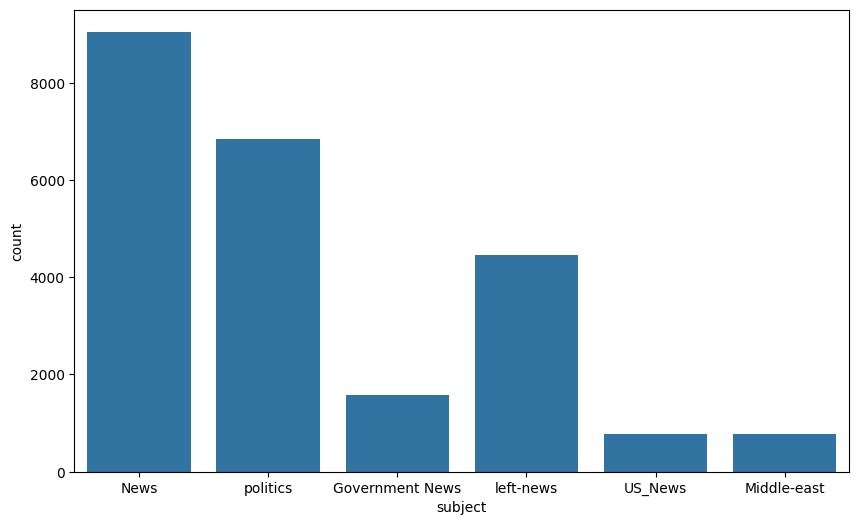

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject',data=fake)

**World cloud**

In [ ]:
text = ' '.join(fake['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'a', 'data'])


'this is a data'

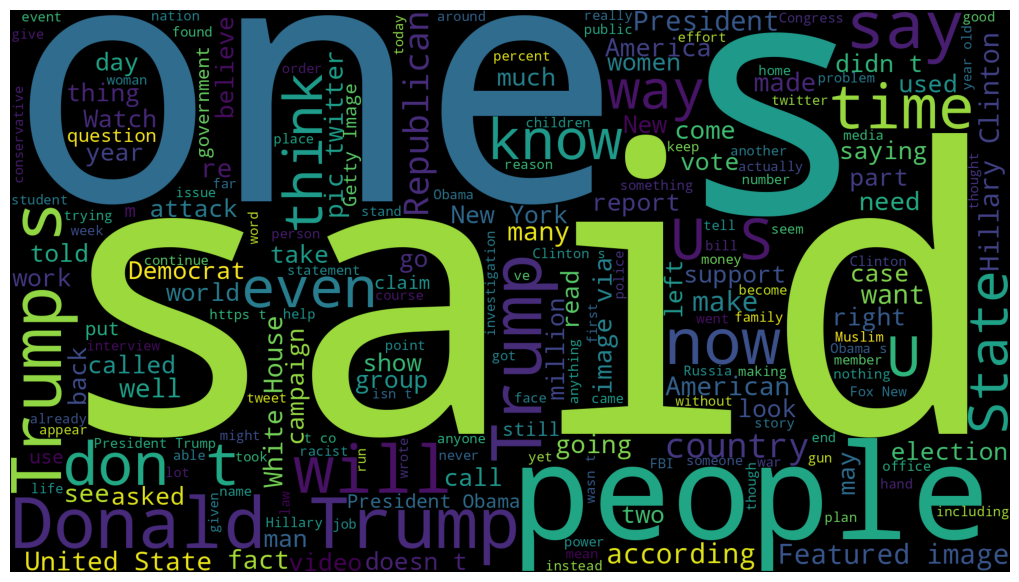

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

*Exploring real news *

In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/refs/heads/main/data/True.csv')

In [ ]:
text = ' '.join(real['text'].tolist())

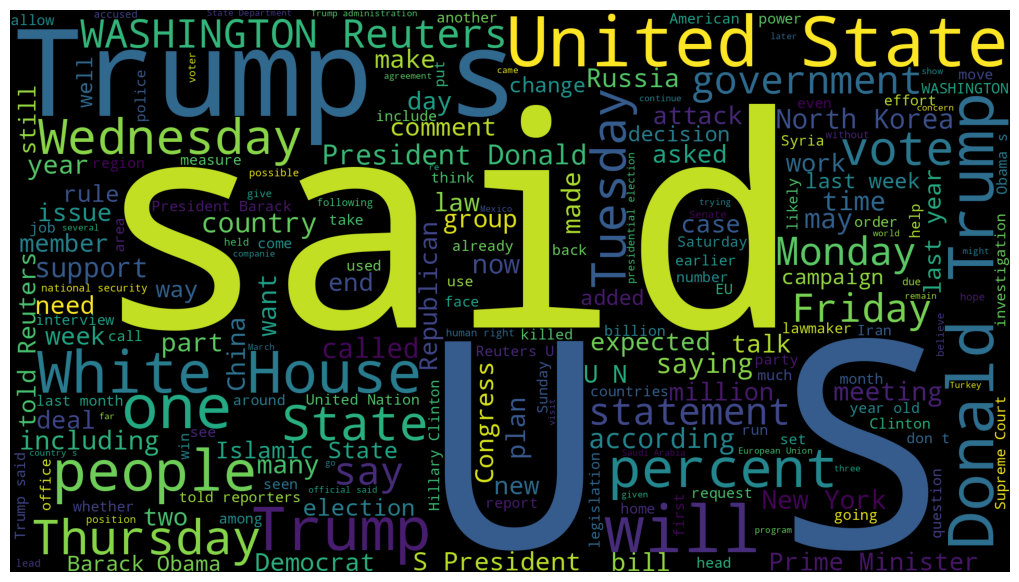

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Main differecnes

**Cleaning data set**

In [ ]:
real.sample(5)

,title,text,subject,date
6605,Democrats lean on drug pricing as Obamacare re...,WASHINGTON/NEW YORK (Reuters) - Democrats are ...,politicsNews,"December 22, 2016"
14073,EU's Juncker says will see in 'next few days' ...,BERN (Reuters) - European Commission President...,worldnews,"November 23, 2017"
1341,Factbox: Trump on Twitter (Oct 9) - North Kore...,The following statements were posted to the ve...,politicsNews,"October 10, 2017"
8874,U.S. legislators to call for release of Americ...,WASHINGTON (Reuters) - A resolution calling fo...,politicsNews,"July 5, 2016"
7700,Exclusive: Trump says Clinton policy on Syria ...,"DORAL, Fla. (Reuters) - U.S. Republican presi...",politicsNews,"October 25, 2016"


In [ ]:
unknown_publishers = []

for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)


In [ ]:
real.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [ ]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unkown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()== ""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real ['title'] + " " + real['text']
fake['text'] = fake ['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x.lower()))
fake['text'] = fake['text'].apply(lambda x: str(x.lower()))

# **PREPROCESSING TEXT**



In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'class']]

In [ ]:
fake = fake[['text', 'class']]

In [ ]:
data = pd.concat([real, fake], ignore_index=True)

In [ ]:
data .sample(5)

,text,class
23461,bombshell: information suggests trump associa...,0
19911,myanmar says u.s. official barred from rohingy...,1
31884,#cnnblackmails private citizen! threatens to e...,0
8067,rubio campaign test: can money bring u.s. repu...,1
10153,obama meets with security advisers on islamic ...,1


REMOVING ESPECIAL CARACTERS

#https://github.com/laxmimerit/preprocess_kgptalkie

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall



  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restar

In [ ]:
!pip install googletrans==3.1.0a0


In [ ]:
import preprocess_kgptalkie as ps


In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))


In [ ]:
ps.remove_special_chars('this,. @ # is gre@t')

'this   is gret'

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


trasnform this data into numeric data, using VECTORIZATION -- WORD2VEC

In [ ]:
!pip install gensim


In [ ]:
import gensim


In [ ]:
y = data['class'].values

In [ ]:
x = [d.split()for d in data['text'].tolist()]

In [ ]:
type(x[0])

list

In [ ]:
print(x[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=x, vector_size=DIM, window=10, min_count=1)


In [ ]:
w2v_model.wv

In [ ]:
len(w2v_model.wv.key_to_index)


230854

In [ ]:
w2v_model.wv['love']


array([ 1.1355513 ,  1.7380135 ,  0.474018  , -0.7892648 , -0.9595668 ,
        1.1734172 , -0.4265011 ,  1.0663786 ,  0.19186464,  4.78245   ,
       -0.6574367 , -2.253798  , -3.088599  , -1.8336431 , -1.5611413 ,
        0.6289252 , -1.3238957 ,  1.9451977 ,  1.8685201 , -0.10020005,
       -1.8720548 ,  0.72399515, -2.8027844 ,  2.5672417 ,  0.28188094,
        5.990799  ,  0.5480355 , -2.2524064 ,  2.2227638 , -3.407516  ,
        4.1749473 , -3.1054187 ,  0.56233853,  2.2317007 , -2.5252752 ,
        2.421674  ,  0.46885887, -1.1021456 , -1.761664  , -1.6234918 ,
        2.345422  , -3.0432305 , -6.3933983 , -0.02811888, -1.8876383 ,
        1.3766545 ,  2.3248127 , -1.0432174 , -0.6320586 ,  1.5759904 ,
       -0.7220506 ,  2.4505548 ,  2.216034  , -1.4512647 ,  0.3400366 ,
       -1.9770437 , -1.6341455 ,  0.16423151, -2.89693   , -0.08419491,
       -2.299497  , -0.3977126 ,  0.25223732, -0.21617283,  1.3585372 ,
        1.0792735 ,  3.3506756 ,  3.6993372 , -2.1383488 ,  4.53

In [ ]:
w2v_model.wv.most_similar('china')

[('beijing', 0.8590579032897949),
 ('taiwan', 0.8102120161056519),
 ('chinas', 0.7629736065864563),
 ('chinese', 0.6879045963287354),
 ('pyongyang', 0.6847132444381714),
 ('waterway', 0.6845718622207642),
 ('india', 0.6599165201187134),
 ('beijings', 0.6412996649742126),
 ('xi', 0.6264079809188843),
 ('japan', 0.6241119503974915)]

TRAINIG MODEL



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)


In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [ ]:
x = data['text'].tolist()



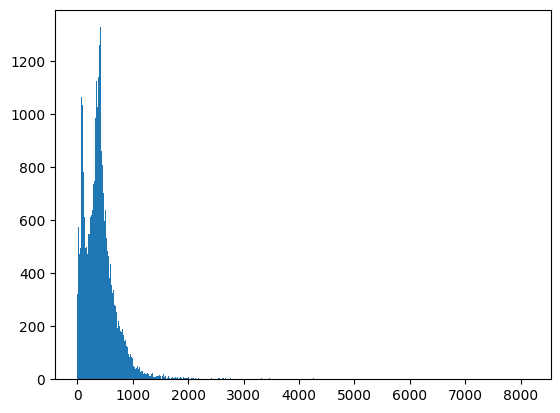

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

X = tokenizer.texts_to_sequences(x)

import matplotlib.pyplot as plt
plt.hist([len(x) for x in X], bins=700)
plt.show()


esse grafico significa que a maioria das palavras tem menos de 100 vezes repetidas, e pouquissimas ali entre 2 mil e 3 mil, a maioria vai ate mil

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1582

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)


In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
vocab = tokenizer.word_index


In [ ]:
def get_weight_matrix(model, vocab):
    weight_matrix = np.zeros((len(vocab)+1, DIM))
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
    return weight_matrix



In [ ]:
embedding_vectors = get_weight_matrix(w2v_model, vocab)



In [ ]:
embedding_vectors.shape

(232375, 100)

criando o modelo de ML

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.build(input_shape=(None, maxlen))
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 100)      │    23,237,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,354,877 (89.09 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 23,237,500 (88.64 MB)

treinando o data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - acc: 0.9172 - loss: 0.2012 - val_acc: 0.9736 - val_loss: 0.0694
Epoch 2/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - acc: 0.9761 - loss: 0.0658 - val_acc: 0.9899 - val_loss: 0.0316
Epoch 3/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - acc: 0.9900 - loss: 0.0300 - val_acc: 0.9932 - val_loss: 0.0212
Epoch 4/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9948 - loss: 0.0161 - val_acc: 0.9939 - val_loss: 0.0193
Epoch 5/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - acc: 0.9978 - loss: 0.0076 - val_acc: 0.9921 - val_loss: 0.0233
Epoch 6/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - acc: 0.9976 - loss: 0.0064 - val_acc: 0.9956 - val_loss: 0.0141


In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9948329621380846

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5915
           1       0.99      0.99      0.99      5310

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ['This is a news']

In [ ]:
X_test

array([[     0,      0,      0, ...,   1625,   2898, 136523],
       [     0,      0,      0, ...,    722,     45,  11561],
       [     0,      0,      0, ...,      4,     93,   1472],
       ...,
       [     0,      0,      0, ...,    346,    237,    275],
       [     0,      0,      0, ...,    176,    608,   3065],
       [     0,      0,      0, ...,     25,   6695,   6609]], dtype=int32)

In [ ]:
x = ['This is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0]])

In [ ]:
x = ['This is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)